In [47]:

#URL_IDH = (f'https://datosmacro.expansion.com/otros/coronavirus-vacuna/argentina') #https://datosmacro.expansion.com/otros/coronavirus-vacuna/argentina

In [48]:
#data = pd.read_html(URL_IDH)
#len(data)

1

In [51]:
#data[0]

,Fecha,Dosis administradas,Personas vacunadas,Completamente vacunadas,% completamente vacunadas
0,27/01/2024,116.978.521,41.529.058,34.900.613,"76,19%"
1,26/01/2024,116.976.959,41.529.042,34.900.613,"76,19%"
2,25/01/2024,116.953.546,41.528.533,34.900.613,"76,19%"
3,24/01/2024,116.930.513,41.527.971,34.900.613,"76,19%"
4,23/01/2024,116.915.867,41.527.597,34.900.613,"76,19%"
...,...,...,...,...,...
95,24/10/2023,116.531.042,41.516.065,34.900.205,"76,19%"
96,23/10/2023,116.525.210,41.515.922,34.900.179,"76,19%"
97,22/10/2023,116.519.772,41.515.783,34.900.159,"76,19%"
98,21/10/2023,116.519.726,41.515.783,34.900.158,"76,19%"


----------------------------------------------------------------------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/data_paises (2).csv')

In [73]:
#calcular columna vacunas administradas por dia
g=df.cumulative_vaccine_doses_administered.tolist()
h=[0.0]
for i in range(1,len(g)):
    h.append(g[i]-g[i-1])
df['vaccine_doses_administered_for_day']=h

In [75]:
df.vaccine_doses_administered_for_day.max()

68283695.0

In [76]:
df[df.vaccine_doses_administered_for_day==68283695.0]

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,...,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,vaccine_doses_administered_for_day
871,AR,2022-05-21,AR,Argentina,4482.0,5.0,101952034.0,44938712.0,19523766.0,20593330.0,...,49.857607,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,68283695.0


conclusion :  existe  variaciones entre fuentes de donde se extrae la data respecto a la columna en discucion, no sea consistente en la informacion . consultar : https://datosmacro.expansion.com/otros/coronavirus-vacuna/argentina

In [60]:
df.info() #pd.to_datetime('10/11/12', format='%d/%y/%m')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           2808 non-null   object        
 1   date                                   2808 non-null   datetime64[ns]
 2   country_code                           2808 non-null   object        
 3   country_name                           2808 non-null   object        
 4   new_confirmed                          2808 non-null   float64       
 5   new_deceased                           2808 non-null   float64       
 6   cumulative_vaccine_doses_administered  2808 non-null   float64       
 7   population                             2808 non-null   float64       
 8   population_male                        2808 non-null   float64       
 9   population_female                      2808 non-null   float64 

##visualizacion de datos atipicos


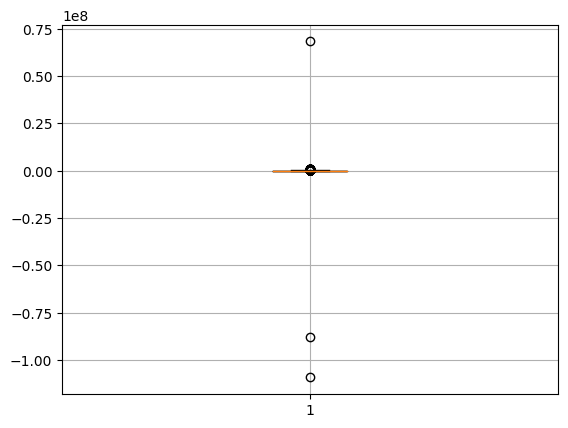

In [128]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.boxplot(df.vaccine_doses_administered_for_day)
plt.grid()
plt.show()

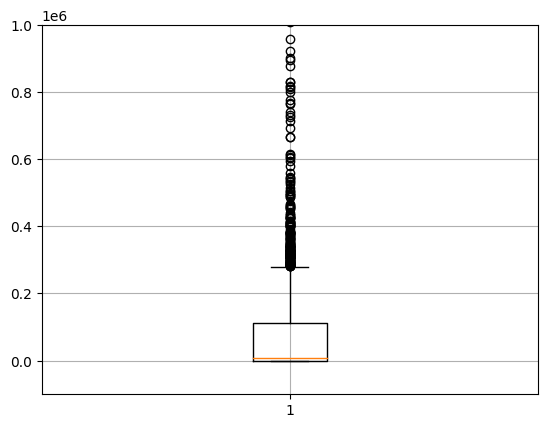

In [103]:
# en escala de -100000 a 1000000
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.boxplot(df.vaccine_doses_administered_for_day)
plt.ylim([-100000,1000000])
plt.grid()
plt.show()


##bosquejo de valores atipicos

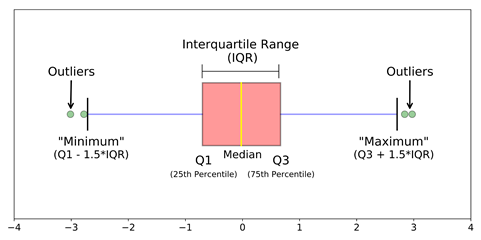

In [105]:
#datos atipicos
data_copia=df.copy()
atipicos = []

data_copia.vaccine_doses_administered_for_day = sorted(data_copia.vaccine_doses_administered_for_day)
q1 = data_copia.vaccine_doses_administered_for_day.quantile(0.25)
q3 =data_copia.vaccine_doses_administered_for_day.quantile(0.75)

#rango intercuartil
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)

dtos=list(data_copia.vaccine_doses_administered_for_day)
for i in dtos:
    if (i<lwr_bound or i>upr_bound):
        atipicos.append(i)

print("metodo IQR: ", atipicos)

metodo IQR:  [-109204825.0, -87566541.0, 282300.0, 282672.0, 282807.0, 283038.0, 283709.0, 284256.0, 284729.0, 285085.0, 285212.0, 285625.0, 285713.0, 285869.0, 288154.0, 289442.0, 289931.0, 290624.0, 290845.0, 291154.0, 291534.0, 292171.0, 292695.0, 295604.0, 295662.0, 295957.0, 296456.0, 297928.0, 299055.0, 300683.0, 302744.0, 302781.0, 305103.0, 305527.0, 305618.0, 307314.0, 307374.0, 307941.0, 308387.0, 308842.0, 309660.0, 309896.0, 310004.0, 310426.0, 311048.0, 312079.0, 312395.0, 312806.0, 314716.0, 314972.0, 316068.0, 316090.0, 316316.0, 316703.0, 317067.0, 317727.0, 317865.0, 318149.0, 319293.0, 321490.0, 322626.0, 322831.0, 324603.0, 324729.0, 325616.0, 327040.0, 327290.0, 327428.0, 327875.0, 328613.0, 328817.0, 328841.0, 329301.0, 329789.0, 330694.0, 332236.0, 333853.0, 337150.0, 338327.0, 338517.0, 338626.0, 338751.0, 339039.0, 339791.0, 340237.0, 340352.0, 343111.0, 345061.0, 345301.0, 346851.0, 347983.0, 350202.0, 350995.0, 354506.0, 356382.0, 357854.0, 361948.0, 363572.0,

In [106]:
len(atipicos) # cantidad atipicos

187

## TRATAMIENTO DE VALORES ATIPICOS
- mencion de tres metodos

  - Recortar/Eliminar los valores atípicos :En esta técnica, quitamos los valores atípicos del conjunto de datos. Aunque no es una buena práctica a seguir
  - Uso de percentil 90 y 10  : si los valores son mayores al percentil 90 reemplazar el percentil 90  y si son menores al percentil 10 reemplazar el percentil 10
  -  reemplazo por mediana o media

In [107]:
# calculemos la media
media = data_copia['vaccine_doses_administered_for_day'].mean()
media

29656.00747863248

In [123]:
#inputacion de valores atipicos
lista= data_copia['vaccine_doses_administered_for_day'].tolist()
for i in range(len(lista)):
  if lista[i] in atipicos:
    lista[i]=round(media)
data_copia['vaccine_doses_administered_for_day']=lista


##diagrama de caja despues de inputacion de datos atipicos

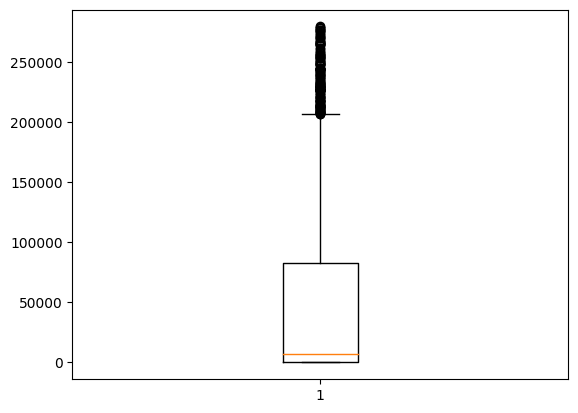

In [124]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.boxplot(data_copia.vaccine_doses_administered_for_day)
plt.show()

In [125]:
# exportar csv

data_copia.to_csv('data_paises_transform.csv',index=False)